# 1) Problem statement.

This dataset is the collection of Algerian Forest Fire incidents with records of around 4 months.

From this data one need to understand about the fire prediction in those two perticular areas.

like in what types of conditions are favourable for the fire happening, so by predecting that one can take respective actions.


# 2) Data Collection.


The Dataset is collected from UCI Mechine Learing Reposatory.

The dataset having 14 columns and 244 rows.

* Importing the packages and libraries of python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency

* Importing the Dataset of Algerian Forest Fire

In [2]:
df = pd.read_csv(r'C:\Users\Jecky\Python Jecky\Dataset\Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


* The dataset sketch

In [3]:
df.shape

(246, 14)

In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.drop(labels=[122,123], axis=0, inplace=True)

lets make a copy of data

In [7]:
df1 = df

Giving the values to two region to two diferent

In [8]:
df1['Region']= 0
df1['Region'][122:]= 1

C:\Users\Jecky\AppData\Local\Temp\ipykernel_3180\60039332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Region'][122:]= 1


In [9]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df1.loc[167]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 167, dtype: object

From the above, it is clear that we need to handle the value of row 167 carefully without loosing the row.
The below steps are for the same

In [11]:
df1.at[167, 'DC']=14.6
df1.at[167, 'ISI']=9
df1.at[167, 'BUI']=12.5
df1.at[167, 'FWI']=10.4


In [12]:
df1.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [13]:
df1.columns=['DAY','MONTH','YEAR','TEMPERATURE','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','CLASSES','REGION']

In [14]:
df1.at[167, 'CLASSES']='fire'

In [15]:
df1.loc[167]

DAY              14
MONTH            07
YEAR           2012
TEMPERATURE      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
CLASSES        fire
REGION            1
Name: 167, dtype: object

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DAY          244 non-null    object
 1   MONTH        244 non-null    object
 2   YEAR         244 non-null    object
 3   TEMPERATURE  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  CLASSES      244 non-null    object
 14  REGION       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 38.6+ KB


In [17]:
df1.isnull().sum()

DAY            0
MONTH          0
YEAR           0
TEMPERATURE    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
CLASSES        0
REGION         0
dtype: int64

In [18]:
df1.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES', 'REGION'],
      dtype='object')

In [19]:
df1['TEMPERATURE'] = df1['TEMPERATURE'].astype(int)
df1['RH'] = df1['RH'].astype(int)
df1['Ws'] = df1['Ws'].astype(int)
df1['Rain'] = df1['Rain'].astype(float)
df1['FFMC'] = df1['FFMC'].astype(float)
df1['DMC'] = df1['DMC'].astype(float)
df1['DC'] = df1['DC'].astype(float)
df1['ISI'] = df1['ISI'].astype(float)
df1['BUI'] = df1['BUI'].astype(float)
df1['FWI'] = df1['FWI'].astype(float)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          244 non-null    object 
 1   MONTH        244 non-null    object 
 2   YEAR         244 non-null    object 
 3   TEMPERATURE  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  CLASSES      244 non-null    object 
 14  REGION       244 non-null    int64  
dtypes: float64(7), int32(3), int64(1), object(4)
memory usage: 35.7+ KB


* **There is no Null in the entire data.**

# Information of the AFF dataset is as below

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [21]:
df1.head(1)

,DAY,MONTH,YEAR,TEMPERATURE,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


there are different types of spacing there in classes column for Not fire and fire,
Use maping function to make it proper

In [22]:
df1['CLASSES'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [23]:
df1['CLASSES']=df1['CLASSES'].map({'not fire   ':"Not fire", 'not fire':'Not fire', 'not fire ':'Not fire', 'not fire     ':'Not fire','not fire    ':'Not fire','fire   ':'fire', 'fire':'fire','fire ':'fire'})

In [24]:
df1['CLASSES'].unique()

array(['Not fire', 'fire'], dtype=object)

In [25]:
df1['Date']=pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DAY          244 non-null    object        
 1   MONTH        244 non-null    object        
 2   YEAR         244 non-null    object        
 3   TEMPERATURE  244 non-null    int32         
 4   RH           244 non-null    int32         
 5   Ws           244 non-null    int32         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    float64       
 13  CLASSES      244 non-null    object        
 14  REGION       244 non-null    int64         
 15  Date         244 non-null    datetime64[ns]
dtypes: datet

In [53]:
df2 = df1

In [54]:
df2.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES', 'REGION', 'Date'],
      dtype='object')

In [55]:
# define numerical & categorical columns
Weather_data_obs = df2.columns[3:7]
FWI_Components = df2.columns[7:14]

# print columns
print('We have {} Weather_data_obs : {}'.format(len(Weather_data_obs), Weather_data_obs))
print('\nWe have {} FWI_Components : {}'.format(len(FWI_Components), FWI_Components))

We have 4 Weather_data_obs : Index(['TEMPERATURE', 'RH', 'Ws', 'Rain'], dtype='object')

We have 7 FWI_Components : Index(['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'CLASSES'], dtype='object')


# Univariate Analysis

* Let's check the distribution of values for the single variable (Univariate)

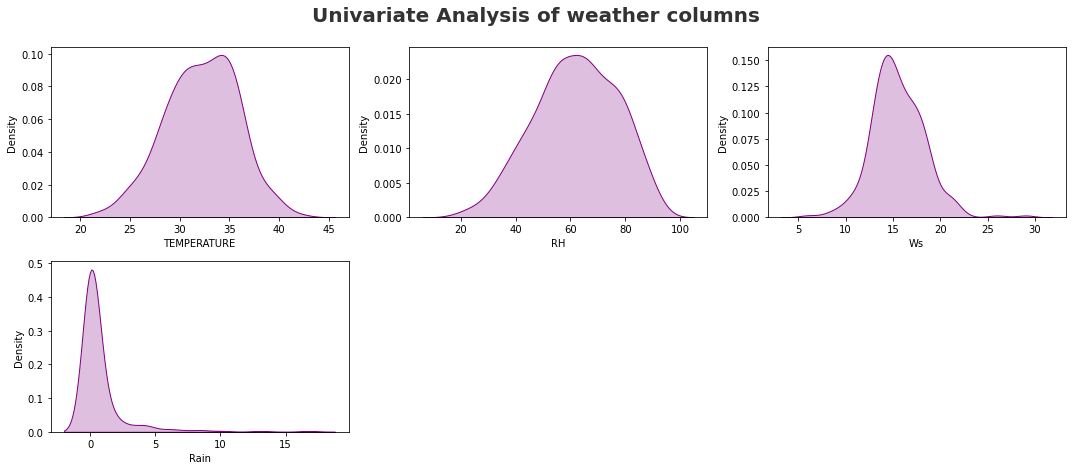

In [56]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of weather columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Weather_data_obs)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df2[Weather_data_obs[i]],shade=True, color='purple')
    plt.xlabel(Weather_data_obs[i])
    plt.tight_layout()

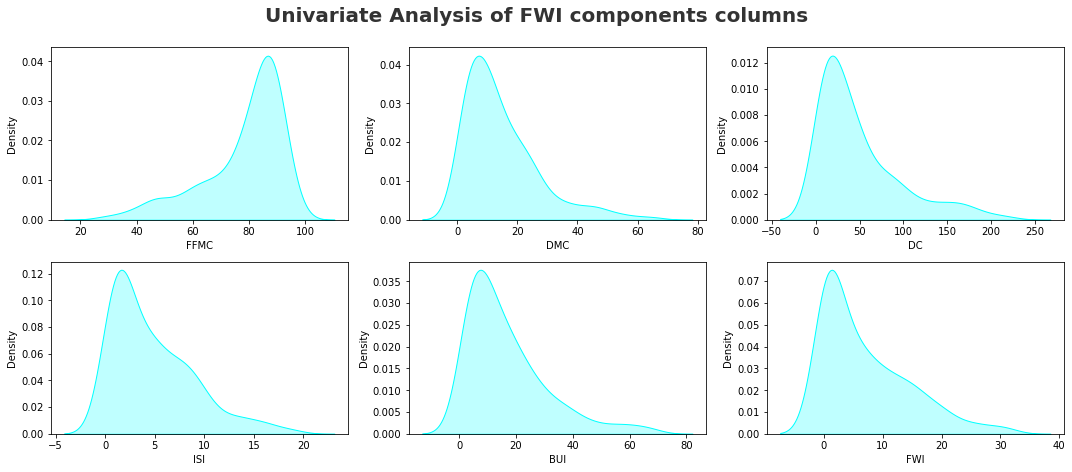

In [58]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of FWI components columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(FWI_Components)-1):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df2[FWI_Components[i]], shade=True, color='Cyan')
    plt.xlabel(FWI_Components[i])
    plt.tight_layout()

* Report 

From the above analyis we can see that 

1) Rain, DMC, FWI, DC, ISI, BUI are right skewed, one clearly find out the outliers from them.
2) FFMC, RH are left skewed.

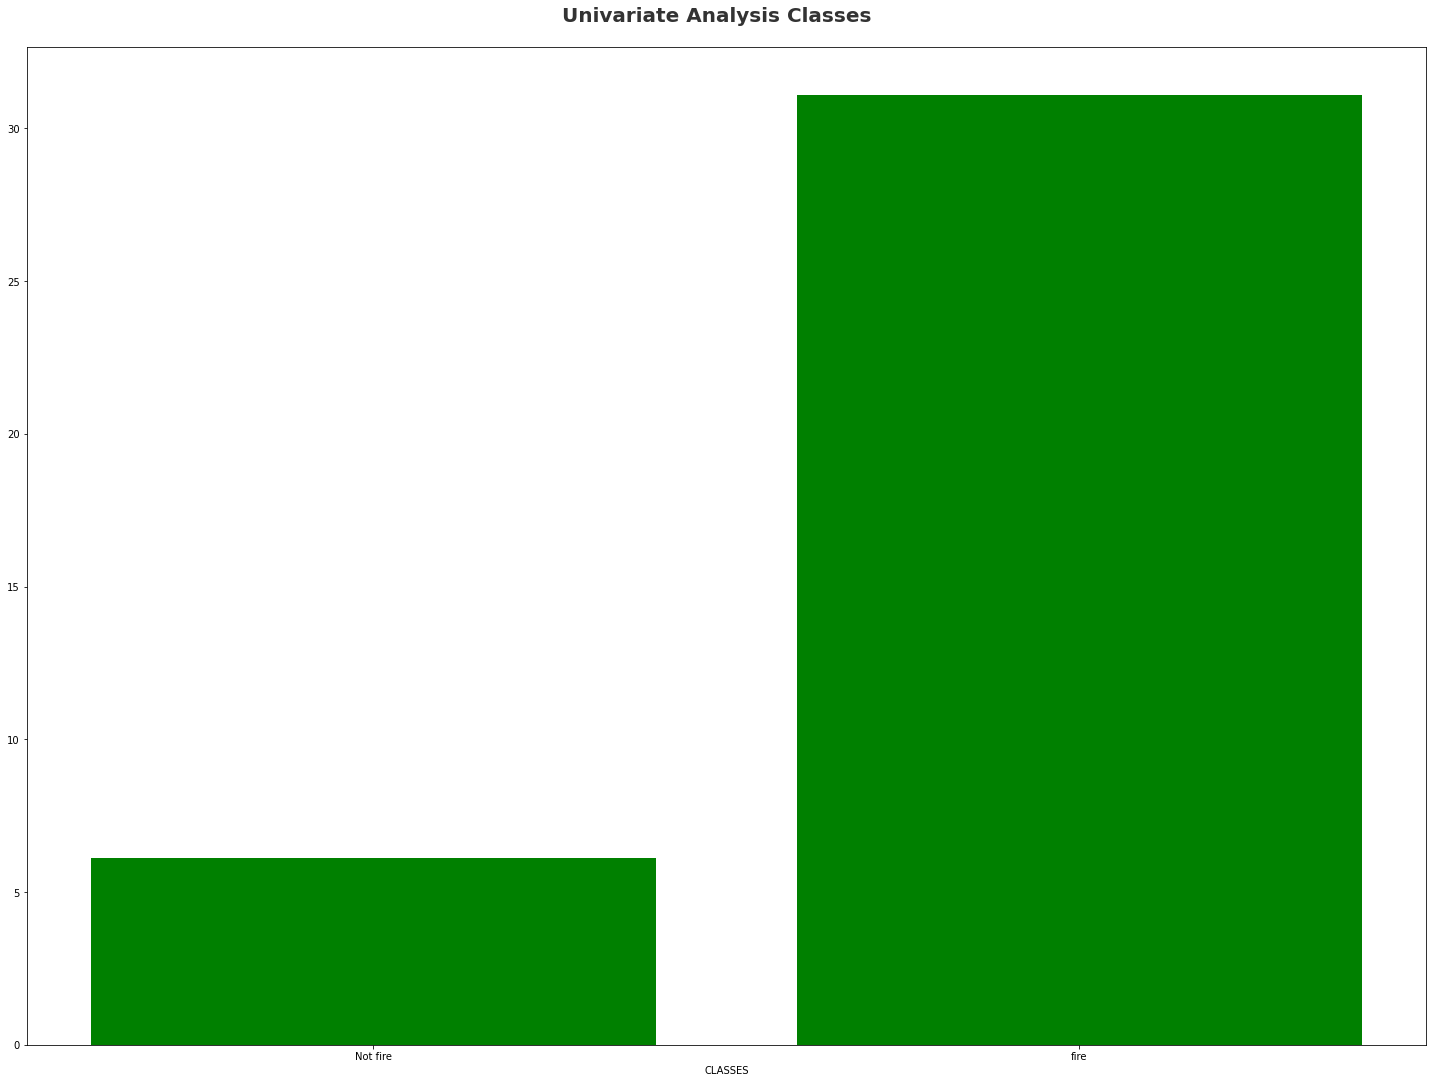

In [117]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis Classes', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.bar(df2['CLASSES'], df2['FWI'], color ='g')
plt.xlabel('CLASSES')
plt.tight_layout()

* **It is very much clear that if the FWI is low there is no fire**

# Multivariate Analysis

* **Finding correlation between all numerical columns**

In [32]:
df2.corr()

,TEMPERATURE,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,REGION
TEMPERATURE,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.198474


<AxesSubplot:>

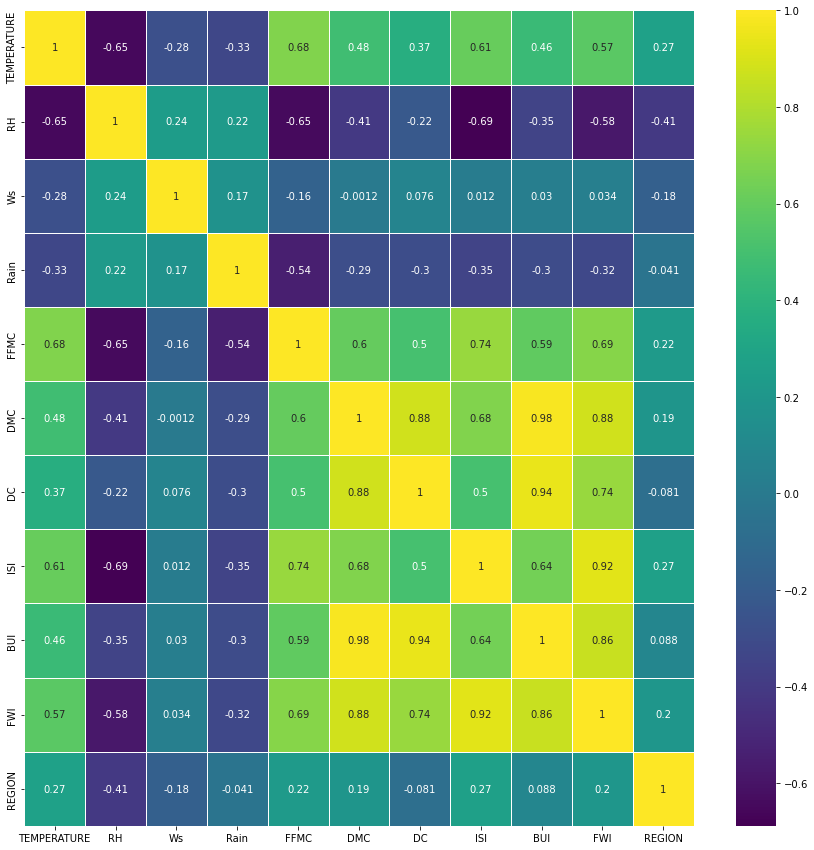

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),cmap = 'viridis',linewidths=0.5, annot= True)

1) The RH (Relative Humidity) having very low correlation with all except Rain and Wind speed, which is correct 

2) The RH and Temperature have strong correlation.

3) DMC has very strong correlation with all exception Rain, Ws and RH.

# Check Multicollinearity for Categorical features

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Classes (Fire or Not fire)**

In [34]:
chi2_test_result = []
for i in categorical_features:
    if chi2_contingency(pd.crosstab(df[i], df['CLASSES']))[1] < 0.05:
        chi2_test_result.append('Reject Null Hypothesis')
    else:
        chi2_test_result.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test_result]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,DAY,Fail to Reject Null Hypothesis
1,MONTH,Reject Null Hypothesis
2,YEAR,Fail to Reject Null Hypothesis
3,CLASSES,Reject Null Hypothesis


* **Here we test correlation of Numerical columns with Target column i.e Classes (Fire or Not fire)**

In [35]:
chi2_test_result = []
for i in numeric_features:
    if chi2_contingency(pd.crosstab(df[i], df['CLASSES']))[1] < 0.05:
        chi2_test_result.append('Reject Null Hypothesis')
    else:
        chi2_test_result.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[numeric_features, chi2_test_result]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TEMPERATURE,Reject Null Hypothesis
1,RH,Reject Null Hypothesis
2,Ws,Fail to Reject Null Hypothesis
3,Rain,Reject Null Hypothesis
4,FFMC,Reject Null Hypothesis
5,DMC,Reject Null Hypothesis
6,DC,Reject Null Hypothesis
7,ISI,Reject Null Hypothesis
8,BUI,Reject Null Hypothesis
9,FWI,Reject Null Hypothesis


In [36]:
z =[]
for i in numeric_features:
    z1 = df2[i].unique()
    z.append(z1)
    z2 = len(z1)
    print(i , z2)

TEMPERATURE 19
RH 62
Ws 18
Rain 39
FFMC 173
DMC 166
DC 198
ISI 106
BUI 173
FWI 126
REGION 2
Date 122


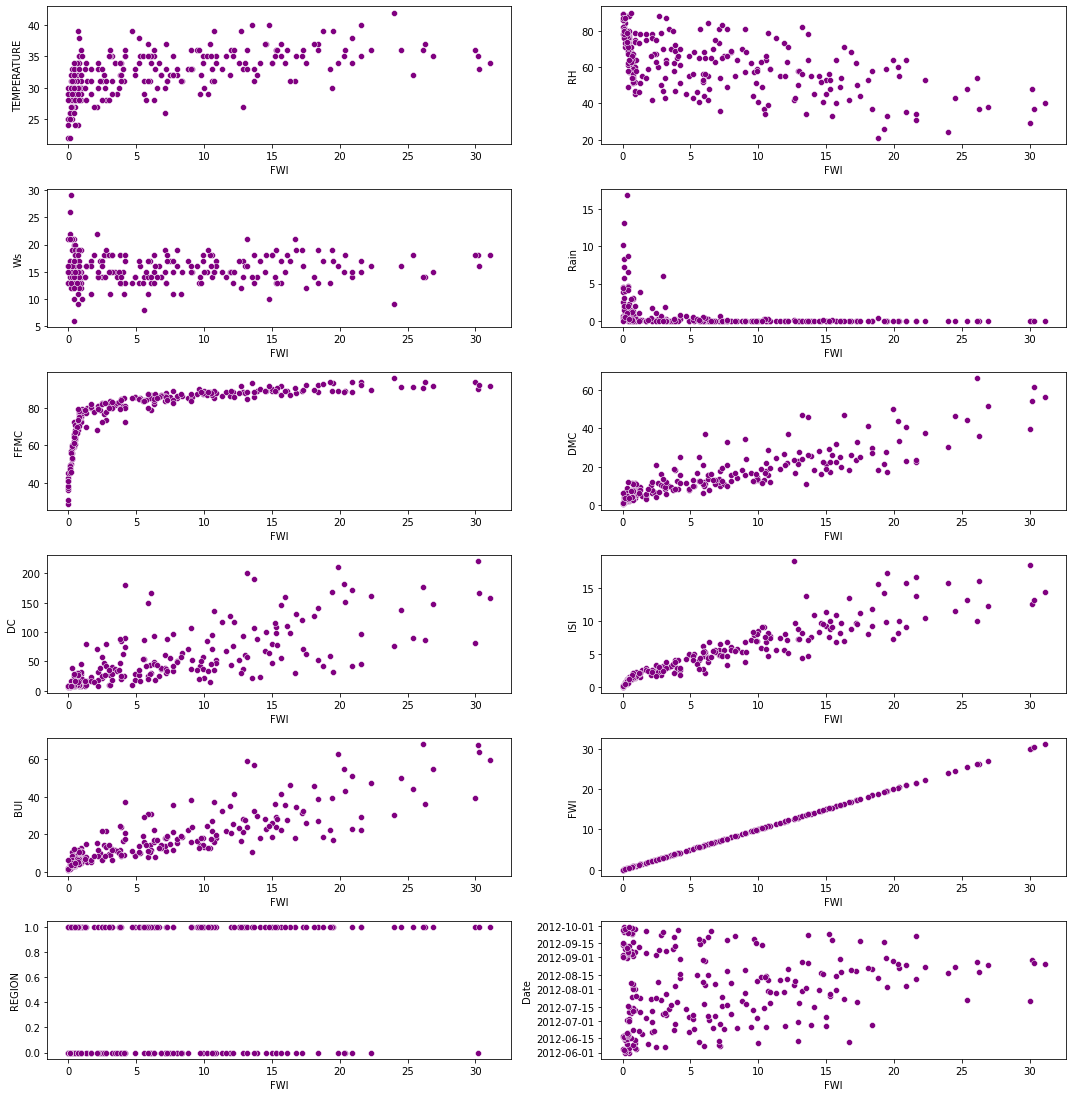

In [37]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(8, 2, i+1)
    sns.scatterplot(data= df2 ,x='FWI', y=numeric_features[i], color='purple')
    plt.tight_layout()

* **If the rain high there is very less chance of fire.**
* **Moderate Wind speed is in the favour fire.**
* **Fire will be low if Initial spered index is low**
* **FFMC haing the trigger point near 80 as we can see that before that fire was not there**

* **For the Target Feature "FWI" Fire Weather Index**

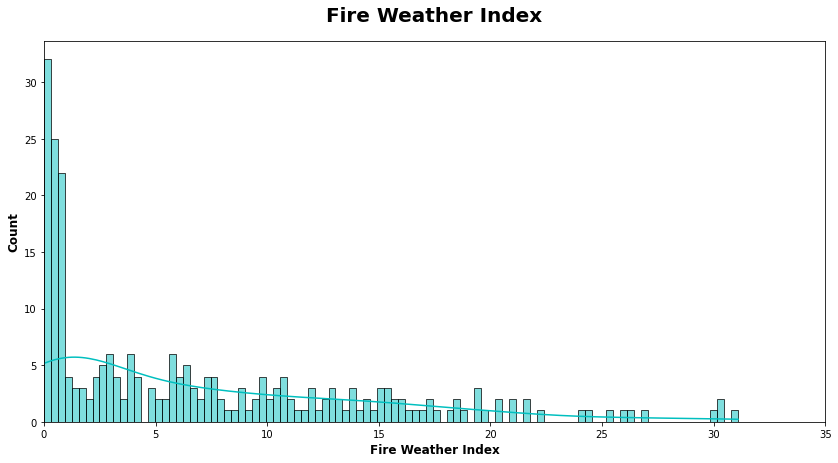

In [38]:
plt.subplots(figsize=(14,7))
sns.histplot(df2.FWI, bins=100, kde=True, color = 'c')
plt.title("Fire Weather Index", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Fire Weather Index", weight="bold", fontsize=12)
plt.xlim(0,35)
plt.show()

* **The above graph shows that FWI having more falling under 1 unit and after that it is clearly right skewed**

# Conclusion

* **1) It is very much clear that if the FWI is low there is no fire**
* **2) Moderate Wind speed is in the favour fire.**
* **3) FFMC can trigger fire high if the reading will cress 80**
* **4) There are many factors on which fire can ignite and grow high in those two region and yes, if          the pridection of fire will be there one can save many trees, shelter of many animals and              prevent environment from carbon dioxcide**